## Import Library

In [2]:
!pip install deep_translator

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from deep_translator import GoogleTranslator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,FunctionTransformer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout,Bidirectional
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
import pickle
import tensorflow as tf
import random
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Loading

In [3]:
!wget https://huggingface.co/datasets/alexandreteles/mental-health-conversational-data/resolve/main/unpacked.csv

--2025-05-23 08:05:30--  https://huggingface.co/datasets/alexandreteles/mental-health-conversational-data/resolve/main/unpacked.csv
Resolving huggingface.co (huggingface.co)... 18.164.174.55, 18.164.174.17, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73976 (72K) [text/plain]
Saving to: ‘unpacked.csv’

unpacked.csv        100%[===================>]  72.24K  --.-KB/s    in 0.01s   

2025-05-23 08:05:30 (5.14 MB/s) - ‘unpacked.csv’ saved [73976/73976]



In [4]:
df = pd.read_csv("/content/unpacked.csv")

In [5]:
df

,pattern,tag,response
0,Hi,greeting,Hello there. Tell me how are you feeling today?
1,Hi,greeting,Hi there. What brings you here today?
2,Hi,greeting,Hi there. How are you feeling today?
3,Hi,greeting,Great to see you. How do you feel currently?
4,Hi,greeting,Hello there. Glad to see you're back. What's g...
...,...,...,...
656,How do I know if I'm unwell?,fact-29,"If your beliefs , thoughts , feelings or behav..."
657,How can I maintain social connections? What if...,fact-30,"A lot of people are alone right now, but we do..."
658,What's the difference between anxiety and stress?,fact-31,Stress and anxiety are often used interchangea...
659,What's the difference between sadness and depr...,fact-32,"Sadness is a normal reaction to a loss, disapp..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pattern   657 non-null    object
 1   tag       661 non-null    object
 2   response  661 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [7]:
df = df.dropna()

In [8]:
df['tag'].value_counts()

,count
tag,
casual,66
greeting,60
about,48
default,40
goodbye,32
...,...
fact-25,1
fact-28,1
fact-29,1


<ipython-input-9-516d5fc4e92f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette=light_colors)


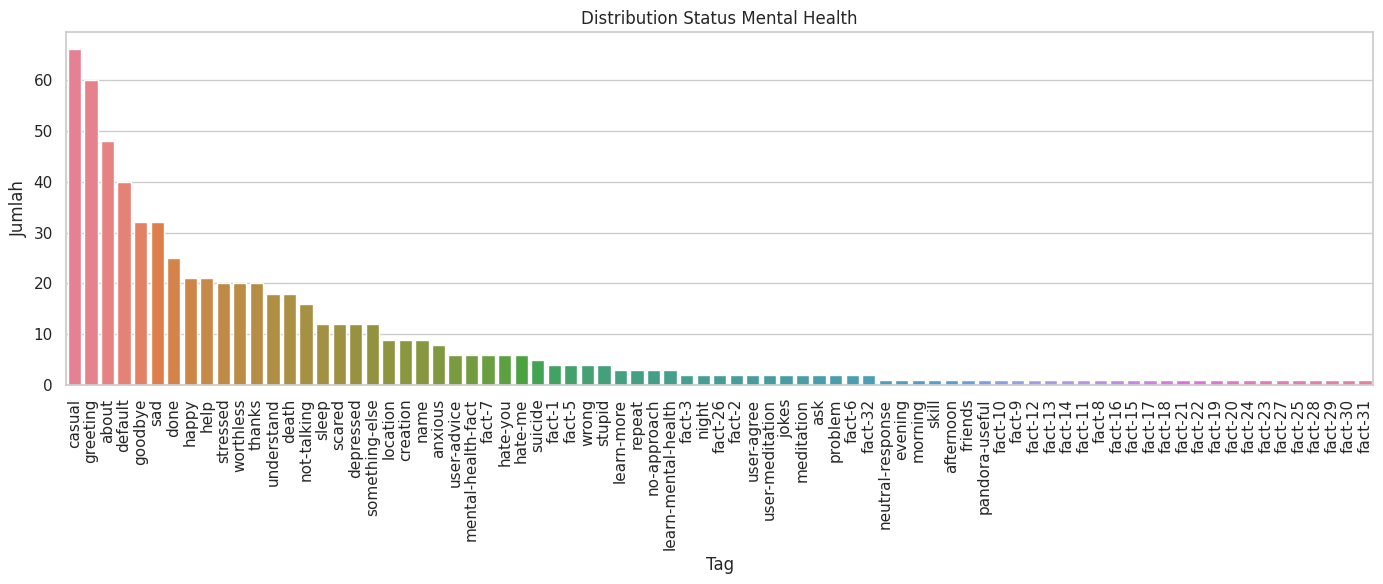

In [9]:
label_counts = df['tag'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))

plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
sns.barplot(x=label_counts.index, y=label_counts.values, palette=light_colors)

plt.title('Distribution Status Mental Health')
plt.xlabel('Tag')
plt.ylabel('Jumlah')
plt.xticks(rotation=90, ha='center')  # ini solusi utamanya
plt.tight_layout()
plt.show()

## Data Preprocessing

In [10]:
clean_df = df.copy()
clean_df

,pattern,tag,response
0,Hi,greeting,Hello there. Tell me how are you feeling today?
1,Hi,greeting,Hi there. What brings you here today?
2,Hi,greeting,Hi there. How are you feeling today?
3,Hi,greeting,Great to see you. How do you feel currently?
4,Hi,greeting,Hello there. Glad to see you're back. What's g...
...,...,...,...
656,How do I know if I'm unwell?,fact-29,"If your beliefs , thoughts , feelings or behav..."
657,How can I maintain social connections? What if...,fact-30,"A lot of people are alone right now, but we do..."
658,What's the difference between anxiety and stress?,fact-31,Stress and anxiety are often used interchangea...
659,What's the difference between sadness and depr...,fact-32,"Sadness is a normal reaction to a loss, disapp..."


In [11]:
sentiment_map_5class = {
    # Positive
    'happy': 'positive',
    'grateful': 'positive',
    'good': 'positive',
    'goodbye': 'positive',
    'thanks': 'positive',
    'done': 'positive',
    'help': 'positive',
    'understand': 'positive',
    'helpful': 'positive',
    'excited': 'positive',
    'hopeful': 'positive',
    'useful': 'positive',
    'pandora-useful': 'positive',
    'friends': 'positive',

    # Negative
    'depressed': 'negative',
    'not-dealing': 'negative',
    'not-talking': 'negative',
    'sad': 'negative',
    'cry': 'negative',
    'hate-you': 'negative',
    'hate-me': 'negative',
    'suicide': 'negative',
    'problem': 'negative',
    'angry': 'negative',
    'wrong': 'negative',
    'bored': 'negative',
    'worthless': 'negative',
    'stupid': 'negative',
    'death': 'negative',

    # Information (dulu 'neutral')
    'casual': 'information',
    'greeting': 'information',
    'being': 'information',
    'about': 'information',
    'default': 'information',
    'neutral-response': 'information',
    'fact-1': 'information',
    'fact-2': 'information',
    'fact-3': 'information',
    'fact-4': 'information',
    'fact-5': 'information',
    'fact-6': 'information',
    'fact-7': 'information',
    'fact-8': 'information',
    'fact-9': 'information',
    'fact-10': 'information',
    'fact-11': 'information',
    'fact-12': 'information',
    'fact-13': 'information',
    'fact-14': 'information',
    'fact-15': 'information',
    'fact-16': 'information',
    'fact-17': 'information',
    'fact-18': 'information',
    'fact-19': 'information',
    'fact-20': 'information',
    'fact-21': 'information',
    'fact-22': 'information',
    'fact-23': 'information',
    'fact-24': 'information',
    'fact-25': 'information',
    'fact-26': 'information',
    'fact-27': 'information',
    'fact-28': 'information',
    'fact-29': 'information',
    'fact-30': 'information',
    'fact-31': 'information',
    'fact-32': 'information',
    'learn-repeat': 'information',
    'no-approach': 'information',
    'learn-meditation': 'information',
    'learn-mental-health': 'information',
    'learn-more': 'information',
    'mental-health-fact': 'information',
    'mental-health-fact ': 'information',
    'user-experience': 'information',
    'user-advice': 'information',
    'user-agree': 'information',
    'user-meditation': 'information',
    'use-joke': 'information',
    'use-agree': 'information',
    'creation': 'information',
    'something-else': 'information',
    'response': 'information',
    'skill': 'information',
    'morning': 'information',
    'evening': 'information',
    'night': 'information',
    'afternoon': 'information',
    'ask': 'information',
    'jokes': 'information',
    'name': 'information',
    'location': 'information',
    'repeat': 'information',
    'meditation': 'information',

    # Anxiety
    'anxious': 'anxiety',
    'stress': 'anxiety',
    'stressed': 'anxiety',
    'worried': 'anxiety',
    'overthinking': 'anxiety',
    'sleep': 'anxiety',

    # Fear
    'scared': 'fear',
    'afraid': 'fear',
    'fear': 'fear'
}

clean_df['sentiment'] = clean_df['tag'].replace(sentiment_map_5class)
print(clean_df['sentiment'].value_counts())

sentiment
information    341
positive       139
negative       125
anxiety         40
fear            12
Name: count, dtype: int64


In [12]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
        text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation/numbers
        words = text.split()
        words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
        return " ".join(words)
    return ""

# Casefolding function (convert text to lowercase)
def casefoldingText(text):
    if isinstance(text, str):
        return text.lower()
    return ""

# Function to fix slang words
def fix_slangwords(text):
    slang_dict = {
          "u": "you", "r": "are", "btw": "by the way", "gr8": "great", "lol": "laugh out loud",
        "omg": "oh my god", "idk": "I don't know", "bff": "best friend forever", "ty": "thank you",
        "smh": "shaking my head", "stfu": "shut the f*** up", "fml": "f*** my life", "g2g": "got to go",
        "tbh": "to be honest", "crybaby": "emotional", "overthinking": "overanalyzing",
        "feels": "feelings", "stressed out": "stress", "shook": "emotionally affected",
        "bipolar": "bi-polar", "heartbroken": "feeling broken", "feeling some type of way": "confused or overwhelmed",
        "tired": "fatigued or exhausted"
    }
    return ' '.join([slang_dict.get(word, word) for word in text.split()])

# Tokenizing function (split text into words)
def tokenizingText(text):
    if isinstance(text, str):
        return text.split()
    return []

# Function to filter stopwords
def filteringText(text):
    stop_words = set(stopwords.words('english'))  # Using English stopwords from nltk
    return [word for word in text if word not in stop_words]

# Function to join the tokens back into a sentence
def toSentence(tokens):
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
# Cleaning the text and storing it in the 'text_clean' column
clean_df['text_clean'] = clean_df['response'].apply(clean_text)

# Lowercasing the text and storing it in the 'text_casefoldingText' column
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Replacing slang words with standard words and storing it in the 'text_slangwords' column
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Tokenizing the text and storing it in the 'text_tokenizingText' column
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Removing stopwords and storing the result in the 'text_stopword' column
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Joining the tokens back into a sentence and storing it in the 'text_final' column
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)


In [14]:
clean_df

,pattern,tag,response,sentiment,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_final
0,Hi,greeting,Hello there. Tell me how are you feeling today?,information,hello tell feeling today,hello tell feeling today,hello tell feeling today,"[hello, tell, feeling, today]","[hello, tell, feeling, today]",hello tell feeling today
1,Hi,greeting,Hi there. What brings you here today?,information,hi brings today,hi brings today,hi brings today,"[hi, brings, today]","[hi, brings, today]",hi brings today
2,Hi,greeting,Hi there. How are you feeling today?,information,hi feeling today,hi feeling today,hi feeling today,"[hi, feeling, today]","[hi, feeling, today]",hi feeling today
3,Hi,greeting,Great to see you. How do you feel currently?,information,great see feel currently,great see feel currently,great see feel currently,"[great, see, feel, currently]","[great, see, feel, currently]",great see feel currently
4,Hi,greeting,Hello there. Glad to see you're back. What's g...,information,hello glad see youre back whats going world right,hello glad see youre back whats going world right,hello glad see youre back whats going world right,"[hello, glad, see, youre, back, whats, going, ...","[hello, glad, see, youre, back, whats, going, ...",hello glad see youre back whats going world right
...,...,...,...,...,...,...,...,...,...,...
656,How do I know if I'm unwell?,fact-29,"If your beliefs , thoughts , feelings or behav...",information,belief thought feeling behaviour significant i...,belief thought feeling behaviour significant i...,belief thought feeling behaviour significant i...,"[belief, thought, feeling, behaviour, signific...","[belief, thought, feeling, behaviour, signific...",belief thought feeling behaviour significant i...
657,How can I maintain social connections? What if...,fact-30,"A lot of people are alone right now, but we do...",information,lot people alone right dont lonely together th...,lot people alone right dont lonely together th...,lot people alone right dont lonely together th...,"[lot, people, alone, right, dont, lonely, toge...","[lot, people, alone, right, dont, lonely, toge...",lot people alone right dont lonely together th...
658,What's the difference between anxiety and stress?,fact-31,Stress and anxiety are often used interchangea...,information,stress anxiety often used interchangeably over...,stress anxiety often used interchangeably over...,stress anxiety often used interchangeably over...,"[stress, anxiety, often, used, interchangeably...","[stress, anxiety, often, used, interchangeably...",stress anxiety often used interchangeably over...
659,What's the difference between sadness and depr...,fact-32,"Sadness is a normal reaction to a loss, disapp...",information,sadness normal reaction loss disappointment pr...,sadness normal reaction loss disappointment pr...,sadness normal reaction loss disappointment pr...,"[sadness, normal, reaction, loss, disappointme...","[sadness, normal, reaction, loss, disappointme...",sadness normal reaction loss disappointment pr...


In [19]:
X = clean_df['text_final'].astype(str)
y = clean_df['sentiment'].astype(str)

In [20]:
# Tokenizing text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, padding='post', maxlen=100)

# Convert the padded sequences into a Pandas DataFrame with column names
X_padded = pd.DataFrame(X_padded)

# Convert the labels to numeric values (Label Encoding)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encoding categorical labels to numeric

# If you want y_encoded as a DataFrame (optional)
y_encoded = pd.DataFrame(y_encoded, columns=['label'])  # Optionally, name the column



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih: 525
Jumlah data uji: 132


## Modeling

### LSTM with Learning Rate 0.0005

In [22]:
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dropout(0.5),  # Increased dropout
    layers.Dense(64, activation='relu'),
    layers.Dense(len(encoder.classes_), activation='softmax')
])
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_cb = ModelCheckpoint("model_mental_health.h5", save_best_only=True)
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

# Train
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[checkpoint_cb, earlystop_cb]
)

# Evaluate
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Akurasi data latih: {train_acc:.4f}")
print(f"Akurasi data uji: {test_acc:.4f}")

Epoch 1/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3331 - loss: 1.5754

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.3495 - loss: 1.5665 - val_accuracy: 0.4717 - val_loss: 1.4388
Epoch 2/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5177 - loss: 1.3755

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5166 - loss: 1.3661 - val_accuracy: 0.4717 - val_loss: 1.3665
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5236 - loss: 1.2404 - val_accuracy: 0.4717 - val_loss: 1.4029
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5299 - loss: 1.2562 - val_accuracy: 0.4717 - val_loss: 1.3693
Epoch 5/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5340 - loss: 1.2183

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5316 - loss: 1.2254 - val_accuracy: 0.4717 - val_loss: 1.3486
Epoch 6/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5078 - loss: 1.2839

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5107 - loss: 1.2771 - val_accuracy: 0.4717 - val_loss: 1.3407
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5280 - loss: 1.2263 - val_accuracy: 0.4717 - val_loss: 1.3451
Epoch 8/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5086 - loss: 1.2565

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5114 - loss: 1.2479 - val_accuracy: 0.4717 - val_loss: 1.3399
Epoch 9/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5237 - loss: 1.2200

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5240 - loss: 1.2203 - val_accuracy: 0.4717 - val_loss: 1.3200
Epoch 10/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5240 - loss: 1.2487

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5224 - loss: 1.2396 - val_accuracy: 0.4717 - val_loss: 1.2786
Epoch 11/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5358 - loss: 1.1342

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5353 - loss: 1.1409 - val_accuracy: 0.4717 - val_loss: 1.2258
Epoch 12/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5277 - loss: 1.1492

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5314 - loss: 1.1451 - val_accuracy: 0.5283 - val_loss: 1.1736
Epoch 13/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6232 - loss: 1.0882

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6203 - loss: 1.0848 - val_accuracy: 0.6415 - val_loss: 1.0400
Epoch 14/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6510 - loss: 0.9775

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6499 - loss: 0.9779 - val_accuracy: 0.6792 - val_loss: 0.9414
Epoch 15/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6994 - loss: 0.8685

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6989 - loss: 0.8642 - val_accuracy: 0.6792 - val_loss: 0.8865
Epoch 16/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7110 - loss: 0.7766

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7070 - loss: 0.7803 - val_accuracy: 0.6792 - val_loss: 0.7799
Epoch 17/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7409 - loss: 0.6900

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7406 - loss: 0.6909 - val_accuracy: 0.7547 - val_loss: 0.7039
Epoch 18/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7885 - loss: 0.6199

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7916 - loss: 0.6190 - val_accuracy: 0.7736 - val_loss: 0.6315
Epoch 19/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8204 - loss: 0.5942 - val_accuracy: 0.7736 - val_loss: 0.6405
Epoch 20/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7917 - loss: 0.6231 - val_accuracy: 0.7547 - val_loss: 0.6739
Epoch 21/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8436 - loss: 0.4900

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8407 - loss: 0.4931 - val_accuracy: 0.7925 - val_loss: 0.5732
Epoch 22/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8659 - loss: 0.4235

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8665 - loss: 0.4274 - val_accuracy: 0.8491 - val_loss: 0.5272
Epoch 23/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8745 - loss: 0.4224

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8746 - loss: 0.4238 - val_accuracy: 0.8679 - val_loss: 0.4992
Epoch 24/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9042 - loss: 0.3836

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9010 - loss: 0.3868 - val_accuracy: 0.8491 - val_loss: 0.4805
Epoch 25/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8801 - loss: 0.3561

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8832 - loss: 0.3567 - val_accuracy: 0.8868 - val_loss: 0.4706
Epoch 26/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8931 - loss: 0.3670

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8952 - loss: 0.3635 - val_accuracy: 0.8868 - val_loss: 0.4397
Epoch 27/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9155 - loss: 0.3394

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9159 - loss: 0.3359 - val_accuracy: 0.8868 - val_loss: 0.4169
Epoch 28/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9196 - loss: 0.3419

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9205 - loss: 0.3377 - val_accuracy: 0.8868 - val_loss: 0.4001
Epoch 29/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9168 - loss: 0.2647

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9174 - loss: 0.2681 - val_accuracy: 0.8868 - val_loss: 0.3760
Epoch 30/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9075 - loss: 0.3082

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9093 - loss: 0.3043 - val_accuracy: 0.8868 - val_loss: 0.3538
Epoch 31/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9322 - loss: 0.2453

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9327 - loss: 0.2486 - val_accuracy: 0.8868 - val_loss: 0.3467
Epoch 32/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9261 - loss: 0.2875

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9256 - loss: 0.2832 - val_accuracy: 0.8868 - val_loss: 0.3293
Epoch 33/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9395 - loss: 0.2150

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9378 - loss: 0.2190 - val_accuracy: 0.9057 - val_loss: 0.2892
Epoch 34/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9440 - loss: 0.2076

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9423 - loss: 0.2084 - val_accuracy: 0.9245 - val_loss: 0.2503
Epoch 35/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9556 - loss: 0.1809

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9546 - loss: 0.1823 - val_accuracy: 0.9057 - val_loss: 0.2477
Epoch 36/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9358 - loss: 0.2141

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9374 - loss: 0.2078 - val_accuracy: 0.9245 - val_loss: 0.2082
Epoch 37/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9532 - loss: 0.1674 - val_accuracy: 0.9245 - val_loss: 0.2166
Epoch 38/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9499 - loss: 0.1711 - val_accuracy: 0.8868 - val_loss: 0.2565
Epoch 39/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8940 - loss: 0.2775

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9015 - loss: 0.2595 - val_accuracy: 0.9434 - val_loss: 0.2057
Epoch 40/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9426 - loss: 0.1951

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9417 - loss: 0.1938 - val_accuracy: 0.9245 - val_loss: 0.1808
Epoch 41/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9428 - loss: 0.1699 - val_accuracy: 0.8868 - val_loss: 0.3013
Epoch 42/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9472 - loss: 0.1943

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9486 - loss: 0.1891 - val_accuracy: 0.9434 - val_loss: 0.1581
Epoch 43/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9294 - loss: 0.1732 - val_accuracy: 0.9245 - val_loss: 0.1832
Epoch 44/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9627 - loss: 0.1706

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9621 - loss: 0.1664 - val_accuracy: 0.9623 - val_loss: 0.1286
Epoch 45/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9476 - loss: 0.1392

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9492 - loss: 0.1361 - val_accuracy: 0.9811 - val_loss: 0.1037
Epoch 46/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9700 - loss: 0.0920

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9709 - loss: 0.0928 - val_accuracy: 0.9811 - val_loss: 0.0969
Epoch 47/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9793 - loss: 0.0725 - val_accuracy: 0.9623 - val_loss: 0.0969
Epoch 48/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9644 - loss: 0.1055

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9652 - loss: 0.1028 - val_accuracy: 0.9811 - val_loss: 0.0912
Epoch 49/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9659 - loss: 0.0823

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9678 - loss: 0.0832 - val_accuracy: 0.9811 - val_loss: 0.0854
Epoch 50/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9742 - loss: 0.0825

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9748 - loss: 0.0813 - val_accuracy: 0.9811 - val_loss: 0.0817
Epoch 51/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9717 - loss: 0.0805

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9733 - loss: 0.0803 - val_accuracy: 0.9811 - val_loss: 0.0781
Epoch 52/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9688 - loss: 0.0877

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9696 - loss: 0.0865 - val_accuracy: 0.9811 - val_loss: 0.0776
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9756 - loss: 0.0865 - val_accuracy: 0.9811 - val_loss: 0.0782
Epoch 54/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9862 - loss: 0.0695

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9860 - loss: 0.0714 - val_accuracy: 0.9811 - val_loss: 0.0758
Epoch 55/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9894 - loss: 0.0502

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9870 - loss: 0.0556 - val_accuracy: 0.9811 - val_loss: 0.0716
Epoch 56/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9840 - loss: 0.0699

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9828 - loss: 0.0687 - val_accuracy: 0.9811 - val_loss: 0.0688
Epoch 57/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9903 - loss: 0.0484

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9887 - loss: 0.0515 - val_accuracy: 0.9811 - val_loss: 0.0686
Epoch 58/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9862 - loss: 0.0406

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9845 - loss: 0.0439 - val_accuracy: 0.9811 - val_loss: 0.0666
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9623 - val_loss: 0.0749
Epoch 60/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9786 - loss: 0.0610 - val_accuracy: 0.9623 - val_loss: 0.0744
Epoch 61/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9796 - loss: 0.0627 - val_accuracy: 0.9623 - val_loss: 0.0790
Epoch 62/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9833 - loss: 0.0431 - val_accuracy: 0.9811 - val_loss: 0.0673
Epoch 63/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9822 - loss: 0.0769 - val_accuracy: 0.9811 - val_loss: 0.0770
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9779 - loss: 0.0579
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9661 - loss: 0.1233
Akurasi data latih: 0.9829
Akurasi data uji: 0.9621


## Inference

In [23]:

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Simpan label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [35]:
import re
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from deep_translator import GoogleTranslator

# Load semua file
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)
with open("label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)
model = load_model("model_mental_health.h5")

# Asumsi: clean_df sudah tersedia
clean_df = clean_df.dropna(subset=['response', 'sentiment'])

# Slang Dictionary
slang_dict = {
    "u": "you", "r": "are", "btw": "by the way", "gr8": "great", "lol": "laugh out loud",
    "omg": "oh my god", "idk": "i don't know", "bff": "best friend forever", "ty": "thank you",
    "smh": "shaking my head", "stfu": "shut the fuck up", "fml": "fuck my life", "g2g": "got to go",
    "tbh": "to be honest", "crybaby": "emotional", "overthinking": "overanalyzing",
    "feels": "feelings", "stressed out": "stress", "shook": "emotionally affected",
    "bipolar": "bi-polar", "heartbroken": "feeling broken", "feeling some type of way": "confused or overwhelmed",
    "tired": "fatigued or exhausted"
}

# Preprocessing function (dengan translasi bolak-balik)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = ' '.join([slang_dict.get(word, word) for word in text.split()])
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
        roundtrip = GoogleTranslator(source='en', target='id').translate(translated)
        return roundtrip
    except:
        return text  # fallback kalau gagal translate

# Bersihkan semua respons
clean_df['response_clean'] = clean_df['response'].apply(preprocess_text)

# Fungsi chatbot
def chatbot_response(user_input):
    # 1. Bersihkan teks
    input_clean = preprocess_text(user_input)

    # 2. Prediksi label (emosi) menggunakan model
    seq = tokenizer.texts_to_sequences([input_clean])
    padded = pad_sequences(seq, maxlen=100, padding='post')
    pred = model.predict(padded, verbose=0)
    label = encoder.inverse_transform([np.argmax(pred)])[0]

    # 3. Filter jawaban yang sesuai label
    subset_df = clean_df[clean_df['sentiment'] == label].copy()
    if subset_df.empty:
        return f"Bot ({label}): Saya paham perasaanmu. Ingin bercerita lebih lanjut?"

    # 4. Cari jawaban paling mirip isi pertanyaannya (TF-IDF)
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(subset_df['response_clean'])
    input_vec = tfidf.transform([input_clean])
    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
    best_idx = np.argmax(similarities)
    best_response = subset_df.iloc[best_idx]['response']

    return f"Bot ({label}): {best_response}"

# Chat loop
print("🧠 Chatbot Mental Health. Ketik 'exit' untuk keluar.\n")
while True:
    user_input = input("Anda: ")
    if user_input.lower() == "exit":
        print("Bot: Terima kasih! Semoga harimu baik 🙏")
        break
    print(chatbot_response(user_input))


🧠 Chatbot Mental Health. Ketik 'exit' untuk keluar.

Anda: Hallo
Bot (information): Hello there. Tell me how are you feeling today?
Anda: Apa Kabar
Bot (information): I see. What else?
Anda: Saya Sedang Sedij
Bot (information): Oh I see. Tell me more
Anda: What's the difference between anxiety and stress?
Bot (information): Stress and anxiety are often used interchangeably, and there is overlap between stress and anxiety. Stress is related to the same fight, flight, or freeze response as anxiety, and the physical sensations of anxiety and stress may be very similar. The cause of stress and anxiety are usually different, however. Stress focuses on mainly external pressures on us that we're finding hard to cope with. When we are stressed, we usually know what we're stressed about, and the symptoms of stress typically disappear after the stressful situation is over. Anxiety, on the other hand, isn't always as easy to figure out. Anxiety focuses on worries or fears about things that could 